# Example: Fit Catalogue with Stardust

In [1]:
import stardust
import numpy as np

Imported filters from filters/filters.txt


Load in the class by providing the path to the .config file.

In [2]:
kwargs = {'custom_gamma':[0.02,0.04,0.06,0.08,.1],
          'custom_qpah_indices':[1,2,3,4,5,6,7,8,9,], 
          'custom_umin_indices': np.array([16,17,18,19])}

# If necessary you can adjust which templates are being used

self = stardust.main.ctf(config_file='example.config',)#**kwargs)

READ CONFIG FILE example.config
Read a catalogue with 300 objects
Read band file: stellar+ir/example.bands
Read param file: stellar+ir/example.param
Detected the following parameters ['ID', 'z', 'Mstar']
Input Bands: ok
Input Filters: ok
Data Loaded Successfully
Objects to Fit: 300


/Users/vasily/miniconda3/envs/stardust/lib/python3.6/site-packages/stardust/main.py:305: RuntimeWarning: invalid value encountered in true_divide
  sn = self.fnu[i]/self.efnu[i]


We can double check what parameters are in the config file

In [14]:
self.config

{'CATALOGUE': 'stellar+ir/c2015_sdc2_example.fits',
 'BANDS_FILE': 'stellar+ir/example.bands',
 'EXTRA_BANDS_FILE': 'None',
 'PARAM_FILE': 'stellar+ir/example.param',
 'PATH': 'test/output/',
 'OUTPUT_NAME': 'test',
 'SAVE_FIGURE': 0.0,
 'SAVE_TABLE': 0.0,
 'SAVE_SED': 0.0,
 'SAVE_COVAR': 0.0,
 'VERBOSE': 1.0,
 'FLUX_UNIT': 'mJy',
 'EXTRA_BANDS': 0.0,
 'USE_COLD_DL': 1.0,
 'RADIO_METHOD': 'delv20',
 'UNCERT_SCALE': 0.05,
 'QSO': 0.0,
 'IGM_SWITCH': 0.0,
 'USE_OWN_STELLAR_MASS': 'False',
 'ABZP': 23.9,
 'FIT_DUST': 1.0,
 'FIT_AGN': 1.0,
 'FIT_STELLAR': 1.0}

These can also be changed manually after loading the module e.g.

In [4]:
self.config['OUTPUT_NAME'] = 'example_name'

Fit a single object from the catalogue and show its SED

/Users/vasily/miniconda3/envs/stardust/lib/python3.6/site-packages/stardust/main.py:1057: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


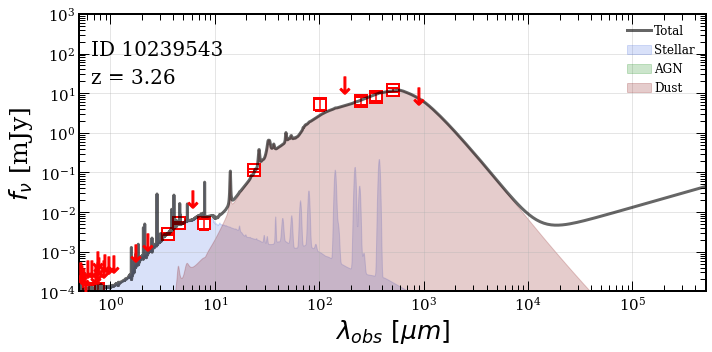

In [5]:
idx = 0
self.fit_object(idx)
self.show_fit(idx,radio=True)

We can also fit the entire catalogue

In [29]:
n_obj = 300 #Number of objects to fit, leave blank to fit everything
n_proc = -1 #Number of threads to use, -1 for all available threads, 1 for serial mode
self.fit_catalogue(n_proc=n_proc,n_obj=n_obj)

Begin Multithreading
12 threads utilised


 24%|██▎       | 71/300 [01:50<03:38,  1.05it/s] /Users/vasily/miniconda3/envs/stardust/lib/python3.6/site-packages/stardust/main.py:694: RuntimeWarning: invalid value encountered in true_divide
  efnu[(fnu/efnu)<=3]*=3
 44%|████▍     | 133/300 [03:46<09:32,  3.43s/it]/Users/vasily/miniconda3/envs/stardust/lib/python3.6/site-packages/stardust/main.py:694: RuntimeWarning: invalid value encountered in true_divide
  efnu[(fnu/efnu)<=3]*=3
100%|██████████| 300/300 [07:46<00:00,  1.56s/it]
/Users/vasily/miniconda3/envs/stardust/lib/python3.6/site-packages/stardust/main.py:1276: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  mp_out=np.array(mp_out)


Finished Fitting, Preparing Output..


/Users/vasily/miniconda3/envs/stardust/lib/python3.6/site-packages/stardust/main.py:771: RuntimeWarning: invalid value encountered in true_divide
  coeffs_norm = self.best_coeffs[idx,:12]/np.sum(self.best_coeffs[idx,:12])
/Users/vasily/miniconda3/envs/stardust/lib/python3.6/site-packages/stardust/main.py:820: RuntimeWarning: invalid value encountered in true_divide
  coeffs_norm_resampled = (resampled_coeffs[:,:12].T/np.sum(resampled_coeffs[:,:12],axis=1)).T
/Users/vasily/miniconda3/envs/stardust/lib/python3.6/site-packages/stardust/main.py:941: RuntimeWarning: overflow encountered in double_scalars
  deltaGDR=10**(10.54-0.99*met_PP04)
/Users/vasily/miniconda3/envs/stardust/lib/python3.6/site-packages/stardust/main.py:872: RuntimeWarning: divide by zero encountered in true_divide
  A/=self.efnu[idx]
/Users/vasily/miniconda3/envs/stardust/lib/python3.6/site-packages/stardust/main.py:854: RuntimeWarning: invalid value encountered in double_scalars
  self.e_mgas[idx] = self.deltaGDR[idx] 

Time Elapsed: 480.68910908699036 s


Access outputs for each object

/Users/vasily/miniconda3/envs/stardust/lib/python3.6/site-packages/stardust/main.py:1057: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


Mstar: 7.24 +- 0.11


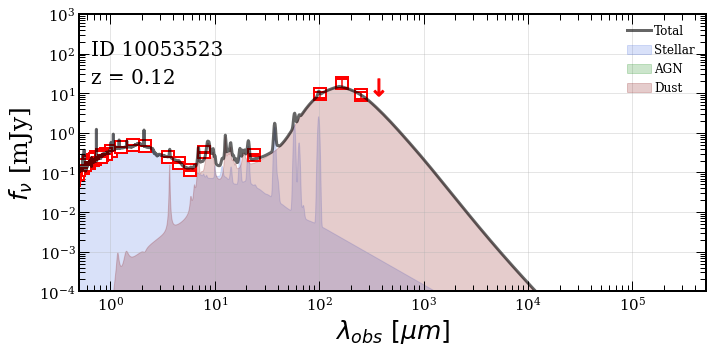

In [30]:
idx = 45
self.show_fit(idx)

#All the physical parameters like mstar, mdust and lir are contained within the self class
#These can be accessed like so
dust_mass = np.log10(self.mdust[idx])
e_dust_mass = self.e_mdust[idx]/self.mdust[idx]*np.log(10)**-1

print(r'Mstar: {:.2f} +- {:.2f}'.format(dust_mass,e_dust_mass))




Alternatively, we can just look at the output table

In [31]:
self.tab

id,z,mstar_input,lir,e_lir,lir_agn,e_lir_agn,lir_tot,e_lir_tot,sfr,e_sfr,f_agn,e_f_agn,mdust,e_mdust,mgas,e_mgas,delta_gdr,mstar,e_mstar,av,e_av,sfr_opt,e_sfr_opt,avu,e_avu,umin,qpah_idx,gamma,chi2,nfilt,lastdet
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,int64,float64
10239543,3.262200117111206,10471296517.666538,5401522134893.614,540555696895.72363,0.0,0.0,5401522134893.614,540555696895.72363,540.1522134893614,0.0,0.0,0.0,8138740415.563267,4834780355.360118,1845352627222.7688,1096223024111.6935,226.73688224457953,133642336559.32864,34472907714.27847,2.0694250421877487,3.5546956767007195e-10,60.369766047573734,28.68539383885828,5.309442846526551,0.3003658520236898,1.2,1.0,0,10.614760621316334,32,0.0
10126383,0.12460000067949295,8912505.467113454,3590773199.0409718,610147147.3344326,0.0,0.0,3590773199.0409718,610147147.3344326,0.3590773199040972,0.0,0.0,0.0,43339682.99272013,11795436.683357539,3.017275962498008e+48,8.211893838226756e+47,6.96192439387438e+40,3670101734.797086,79617988.93194795,0.3311018256134678,1.0311222854251115e-11,1.2155923849915529,0.02338687302822795,0.6628148525487135,0.3003658520236898,0.6,5.0,0,26.209484770257163,31,0.0
10253058,0.24740000069141388,138038535583.8289,142776753533.43195,229856775.96481228,4597540531.448797,1210688766.5446317,147374294064.88074,1226447534.5831223,14.277675353343195,0.0,0.031196353208143308,0.04777905852000336,315496500.8859874,30878215.59333685,24081219561.043003,2356872698.32853,76.32800837225564,291494416242.37976,251638604.4368286,0.8497789657746542,2.9795475070707006e-13,8.543184471279577,0.027937575930824465,3.620369877510062,0.3003658520236898,3.0,6.0,0,154.57051787810812,33,0.0
10108428,0.6700000166893005,23442281975.923817,294435314444.9227,836207449.7122726,0.0,0.0,294435314444.9227,836207449.7122726,29.443531444492272,0.0,0.0,0.0,604421193.413675,70305243.32519159,69594275337.43307,8095087523.328914,115.14201701693426,101330355334.18723,4985963721.643898,1.1340100270028226,2.467376606386547e-11,31.624437101491953,1.7232317581885326,3.8970878937186013,0.3003658520236898,3.0,2.0,0,20.832680611029026,33,0.0
10041645,2.572499990463257,45708802901.85209,2039756138682.4624,7477674616.218628,0.0,0.0,2039756138682.4624,7477674616.218628,203.97561386824626,0.0,0.0,0.0,3550405573.994991,993448740.2122567,401328959636.7215,112296959052.25026,113.03749706125481,128415887584.8914,11366234404.293121,1.1259284537404164,2.1087952246316243e-10,14.136794540417409,11.1072890432147,4.596108464053105,0.3003658520236898,4.0,2.0,0,7.194948137190404,30,0.0
10227270,0.7372999787330627,32359382746.997105,193337339940.01733,1091344858.443266,0.0,392048016.3829653,193337339940.01733,1307433615.543457,19.333733994001733,0.0,0.0,0.020097503713902252,242648466.61204094,41409769.4472457,23848823900.428192,4069979559.704698,98.28549190281487,47818670744.05098,5080841989.351433,1.871935298138688,6.610520150939189e-11,27.167775773863923,2.211663401471821,6.374236528735546,0.3003658520236898,5.0,3.0,0,31.892736476905657,33,0.0
10120472,1.05649995803833,70794640622.02759,392945466365.3939,1564806198.610941,7454452960.699895,5031421904.128202,400399919326.0938,6803228876.45908,39.294546636539394,0.0,0.018617518637981636,0.08266633400090387,244527762.10786226,62916065.63027337,20921725780.040485,5383080681.4278145,85.55971559095127,103966877263.70624,7302108018.229515,0.5477248223462736,9.018139242587406e-11,27.390936633869288,5.599802040449051,12.855651660266336,0.3003658520236898,10.0,2.0,0,26.33349455719597,33,0.0
10094501,0.03999999910593033,13489632380.568445,65060873541.54727,0.0,1683687765.450851,0.0,66744561306.99812,0.0,6.506087354154728,0.0,0.025225842113285678,0.0,49634248.61793076,0.0,5872006464.154132,0.0,118.30553756046633,140734.9040088611,44877.53202880898,0.06006750638728917,0.0,1.09645620342801

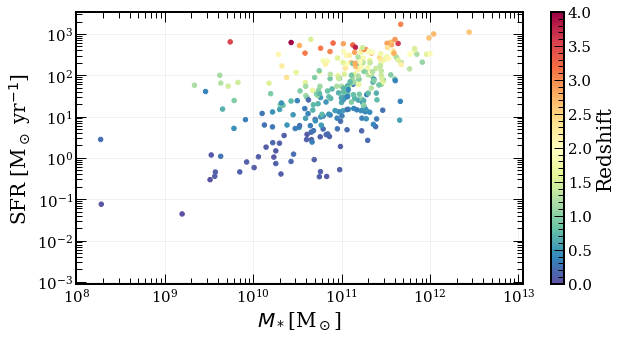

In [68]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,5))

plt.scatter(self.tab['mstar'],self.tab['sfr'],c=self.tab['z'],s=20,vmin=0,vmax=4,cmap='Spectral_r')
plt.colorbar(label='Redshift')
plt.loglog()
plt.xlim(1e8,)
plt.ylabel(r'SFR [M$_\odot$ yr$^{-1}$]')
plt.xlabel(r'$M_*$[M$_\odot$]')
plt.grid(alpha=.2)

In [4]:
self.set_ztemps()

Z_MIN, Z_MAX or Z_STEP parameters are not defined in config.
Using default values (0.01,12,0.005)
Redshift Templates Ready. Time Elapsed:44.618184089660645s
